In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the paths to the folders
train_dir = 'C:/Users/Hp/OneDrive/Desktop/pythonpandas/project/Machine_Learning/Brain_tumour_detection/Training'
test_dir = 'C:/Users/Hp/OneDrive/Desktop/pythonpandas/project/Machine_Learning/Brain_tumour_detection/Testing'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
pip install kagglehub


In [ ]:
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

# Check directory structure
print("Downloaded files:", os.listdir(path))

# Assuming the dataset is structured with folders for each class (like 'tumor' and 'no_tumor')
train_path = os.path.join(path, 'Training')
test_path = os.path.join(path, 'Testing')

# Step 3: Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),  # Adjust based on image size in dataset
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Step 4: Check data
train_images, train_labels = next(train_generator)
print("Train images batch shape:", train_images.shape)
print("Train labels batch shape:", train_labels.shape)


100%|██████████| 149M/149M [00:16<00:00, 9.22MB/s] 

Extracting files...


Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1
Downloaded files: ['Testing', 'Training']
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Train images batch shape: (32, 150, 150, 3)
Train labels batch shape: (32,)


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [10]:
base_model.trainable = False

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Dense layer with ReLU
predictions = Dense(4, activation='softmax')(x)  # Final layer with 4 units for 4 classes


In [12]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust based on your needs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.6815 - loss: 0.7980 - val_accuracy: 0.6934 - val_loss: 0.8372
Epoch 2/10


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7121 - loss: 0.7067 - val_accuracy: 0.7002 - val_loss: 0.7635
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.7573 - loss: 0.6275 - val_accuracy: 0.6651 - val_loss: 0.7628
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.7687 - loss: 0.5928 - val_accuracy: 0.7079 - val_loss: 0.7174
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.7759 - loss: 0.5647 - val_accuracy: 0.7170 - val_loss: 0.7673
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [18]:
# Print training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: [0.6915265917778015, 0.0, 0.7240896224975586, 0.0, 0.7526260614395142, 0.0, 0.7606792449951172, 0.0, 0.7746848464012146, 0.0]
Validation Accuracy: [0.6933638453483582, 0.7002288103103638, 0.6651411056518555, 0.7078565955162048, 0.7170099020004272]


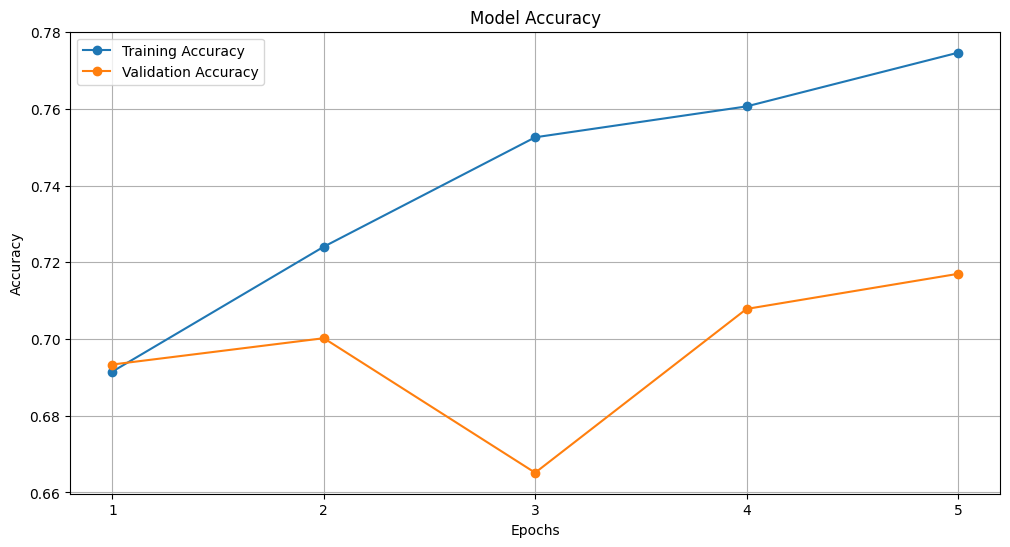

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(len(train_accuracy)), range(1, len(train_accuracy) + 1))  # Set x-ticks to match epochs
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [26]:
# Unfreeze some layers in the base model
for layer in base_model.layers[-5:]:  # Adjust as necessary
    layer.trainable = True


In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.layers import Dropout

x = Dropout(0.5)(x)  


In [30]:
from tensorflow.keras.regularizers import l2

x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)


In [32]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)


In [35]:
# Compile the model with callbacks
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Increase the number of epochs if needed
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7090 - loss: 0.7706 - val_accuracy: 0.5309 - val_loss: 1.4886 - learning_rate: 0.0010
Epoch 2/10


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7957 - loss: 0.5103 - val_accuracy: 0.7689 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 456s 3s/step - accuracy: 0.8174 - loss: 0.4758 - val_accuracy: 0.7285 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.8159 - loss: 0.4617 - val_accuracy: 0.7002 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.8551 - loss: 0.3711 - val_accuracy: 0.7689 - val_loss: 0.5934 - learning_rate: 5.0000e-04
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━